# Giancarlo Palumbo
## To see if the restaurants in Newark, NJ are worth going to by reading through yelp reviews
### May 2, 2023
## We need to collect the data and clean and visualize if the restuarants have a positive sentiment
### In the end, the data was cleaned and visualized to show that the restaurants do have a poisitve sentiment in their reviews

In [1]:
import requests
import yelpKeys
from textblob import TextBlob

In [2]:
API_KEY = yelpKeys.api_key
headers = {'Authorization': 'Bearer %s' % yelpKeys.api_key,}

In [3]:
"""
Yelp Fusion API code sample.
This program demonstrates the capability of the Yelp Fusion API
by using the Search API to query for businesses by a search term and location,
and the Business API to query additional information about the top result
from the search query.
Please refer to https://docs.developer.yelp.com/docs/get-started for the API
documentation.
This program requires the Python requests library, which you can install via:
`pip install -r requirements.txt`.
Sample usage of the program:
`python sample.py --term="bars" --location="San Francisco, CA"`
"""
from __future__ import print_function

import argparse
import json
import pprint
import requests
import sys
import urllib


# This client code can run on Python 2.x or 3.x.  Your imports can be
# simpler if you only need one of those.
try:
    # For Python 3.0 and later
    from urllib.error import HTTPError
    from urllib.parse import quote
    from urllib.parse import urlencode
except ImportError:
    # Fall back to Python 2's urllib2 and urllib
    from urllib2 import HTTPError
    from urllib import quote
    from urllib import urlencode


# Yelp Fusion no longer uses OAuth as of December 7, 2017.
# You no longer need to provide Client ID to fetch Data
# It now uses private keys to authenticate requests (API Key)
# You can find it on
# https://www.yelp.com/developers/v3/manage_app
API_KEY= yelpKeys.api_key


# API constants, you shouldn't have to change these.
API_HOST = 'https://api.yelp.com'
SEARCH_PATH = '/v3/businesses/search'
BUSINESS_PATH = '/v3/businesses/'  # Business ID will come after slash.


# Defaults for our simple example.
DEFAULT_TERM = 'dinner'
DEFAULT_LOCATION = 'San Francisco, CA'
SEARCH_LIMIT = 50


def request(host, path, api_key, url_params=None):
    """Given your API_KEY, send a GET request to the API.
    Args:
        host (str): The domain host of the API.
        path (str): The path of the API after the domain.
        API_KEY (str): Your API Key.
        url_params (dict): An optional set of query parameters in the request.
    Returns:
        dict: The JSON response from the request.
    Raises:
        HTTPError: An error occurs from the HTTP request.
    """
    url_params = url_params or {}
    url = '{0}{1}'.format(host, quote(path.encode('utf8')))
    headers = {
        'Authorization': 'Bearer %s' % api_key,
    }

    print(u'Querying {0} ...'.format(url))

    response = requests.request('GET', url, headers=headers, params=url_params)

    return response.json()


def search(api_key, term, location):
    """Query the Search API by a search term and location.
    Args:
        term (str): The search term passed to the API.
        location (str): The search location passed to the API.
    Returns:
        dict: The JSON response from the request.
    """

    url_params = {
        'term': term.replace(' ', '+'),
        'location': location.replace(' ', '+'),
        'limit': SEARCH_LIMIT
    }
    return request(API_HOST, SEARCH_PATH, api_key, url_params=url_params)


def get_business(api_key, business_id):
    """Query the Business API by a business ID.
    Args:
        business_id (str): The ID of the business to query.
    Returns:
        dict: The JSON response from the request.
    """
    business_path = BUSINESS_PATH + business_id

    return request(API_HOST, business_path, api_key)


def query_api(term, location):
    """Queries the API by the input values from the user.
    Args:
        term (str): The search term to query.
        location (str): The location of the business to query.
    """
    response = search(API_KEY, term, location)

    businesses = response.get('businesses')

    if not businesses:
        print(u'No businesses for {0} in {1} found.'.format(term, location))
        return

    business_id = businesses[0]['id']

    print(u'{0} businesses found, querying business info ' \
        'for the top result "{1}" ...'.format(
            len(businesses), business_id))
    response = get_business(API_KEY, business_id)

    print(u'Result for business "{0}" found:'.format(business_id))
    pprint.pprint(response, indent=2)

In [4]:
response = search(API_KEY,DEFAULT_TERM, 'Newark, NJ')

Querying https://api.yelp.com/v3/businesses/search ...


## Takes a review, goes through the words used in the review, and returns if the review was positive, negative, or neutral

In [17]:
for business in response['businesses']:
    #print(response)
    print('Business Name: ' + business['name'])
    print('Rating: ' + str(business['rating']))
    print('Review Count: ' + str(business['review_count']))
    print('Reviews: ')
    BUS_REVIEW='/v3/businesses/{}/reviews'.format(business['id'])
    #print('https://api.yelp.com/v3/businesses/{}/reviews?limit=20&sort_by=yelp_sort'.format(business['id']))
    reviews = request(API_HOST,BUS_REVIEW, API_KEY)
    for review in reviews['reviews']:
        print(' - ' + review['text'])
        # Perform sentiment analysis on the review using TextBlob
        blob = TextBlob(review['text'])
        sentiment = blob.sentiment.polarity
        if sentiment > 0:
            print('    Sentiment: Positive')
        elif sentiment < 0:
            print('    Sentiment: Negative')
        else:
            print('    Sentiment: Neutral')

Business Name: The Yard - Newark
Rating: 4.5
Review Count: 93
Reviews: 
Querying https://api.yelp.com/v3/businesses/xourj6RfBE_0uK0ffiffgA/reviews ...
 - I had this restaurant on my list for my trip to New Jersey. The good vibes exude as you walk in. The customer service is excellent. 

I ordered the shrimp...
    Sentiment: Positive
 - Excellent food excellent service and staff. The parking is not too good except on Sundays
My nephew, Craig Clark recommend this place and it was very...
    Sentiment: Positive
 - - Black owned!
- located inside the park if you get lost
- no alcohol
- great rnb/rap/Caribbean soundtrack
- oxtail is superb
- shrimp burger tastes...
    Sentiment: Positive
Business Name: Sabor Unido
Rating: 4.5
Review Count: 468
Reviews: 
Querying https://api.yelp.com/v3/businesses/XJofZdWC-oRQSDZD0sJGnA/reviews ...
 - So happy we tried this place - the reviews were right about how good the food is and how friendly the people are. The place is small so def make a...
    Se

KeyError: 'reviews'

In [72]:
blob.sentiment

Sentiment(polarity=-0.3083333333333333, subjectivity=0.5472222222222222)

In [27]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/palumbo.giancarlo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
from nltk.corpus import stopwords
stops = stopwords.words('english')

## Removes stop words from one review

In [66]:
[word for word in blob.words if word not in stops]

['We',
 'stumbled',
 'upon',
 'place',
 'due',
 'volume',
 'reviews',
 'compared',
 'others',
 'area',
 'alarming',
 'thing',
 'seeing',
 'number',
 'bad',
 'yelp',
 'reviews']

### The overall positive/negative sentiment of the reviews of Newark, NJ

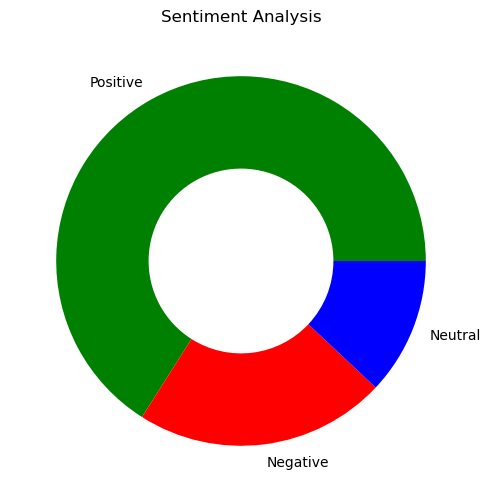

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define data
pos = 39
neg = 11
neu = 6
labels = ['Positive', 'Negative', 'Neutral']
values = [33,11,6]

# Create donut chart
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(values, labels=labels, wedgeprops=dict(width=0.5), colors=['green', 'red', 'blue'])
ax.set_title('Sentiment Analysis')

plt.show()